                    **IMPLEMENTATION OF TIME SERIES FORECASTING THROUGH FACEBOOK PROJECT** 

In [363]:
!pip install pystan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [364]:
!pip install convertdate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [365]:
!pip install lunarcalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [366]:
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [367]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [368]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [369]:
data = pd.read_csv("/content/drive/MyDrive/pay.uk_assessment/Total_FPS.csv")

In [370]:
data

,Date,standing_order_payment,single_immediate_payment,forward_dated_payments
0,31/05/2008,0.01,332,1.5
1,30/06/2008,436,"3,226",498
2,31/07/2008,"1,316","4,669",992
3,31/08/2008,"2,511","4,441",968
4,30/09/2008,"5,377","5,099","1,148"
...,...,...,...,...
175,31/12/2022,"32,787","272,812","37,150"
176,31/01/2023,"33,263","282,893","34,917"
177,28/02/2023,"31,576","264,891","32,565"
178,31/03/2023,"33,992","307,382","36,851"


In [371]:
data.shape

(180, 4)

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      180 non-null    object
 1   standing_order_payment    180 non-null    object
 2   single_immediate_payment  180 non-null    object
 3   forward_dated_payments    180 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


In [373]:
data.isnull().sum()

Date                        0
standing_order_payment      0
single_immediate_payment    0
forward_dated_payments      0
dtype: int64

In [374]:
data['standing_order_payment']=data['standing_order_payment'].str.replace(',','')
data['single_immediate_payment'] = data['single_immediate_payment'].str.replace(',','')
data['forward_dated_payments'] = data['forward_dated_payments'].str.replace(',','')


In [375]:
data['standing_order_payment']=data['standing_order_payment'].astype(float)
data['single_immediate_payment']=data['single_immediate_payment'].astype(float)
data['forward_dated_payments']=data['forward_dated_payments'].astype(float)

In [376]:
data

,Date,standing_order_payment,single_immediate_payment,forward_dated_payments
0,31/05/2008,0.01,332.0,1.5
1,30/06/2008,436.00,3226.0,498.0
2,31/07/2008,1316.00,4669.0,992.0
3,31/08/2008,2511.00,4441.0,968.0
4,30/09/2008,5377.00,5099.0,1148.0
...,...,...,...,...
175,31/12/2022,32787.00,272812.0,37150.0
176,31/01/2023,33263.00,282893.0,34917.0
177,28/02/2023,31576.00,264891.0,32565.0
178,31/03/2023,33992.00,307382.0,36851.0


In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      180 non-null    object 
 1   standing_order_payment    180 non-null    float64
 2   single_immediate_payment  180 non-null    float64
 3   forward_dated_payments    180 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.8+ KB


In [378]:
data.isnull().sum()

Date                        0
standing_order_payment      0
single_immediate_payment    0
forward_dated_payments      0
dtype: int64

In [379]:
data['total_fps_payments'] = data['standing_order_payment']+ data['single_immediate_payment']+data['forward_dated_payments']

In [380]:
data

,Date,standing_order_payment,single_immediate_payment,forward_dated_payments,total_fps_payments
0,31/05/2008,0.01,332.0,1.5,333.51
1,30/06/2008,436.00,3226.0,498.0,4160.00
2,31/07/2008,1316.00,4669.0,992.0,6977.00
3,31/08/2008,2511.00,4441.0,968.0,7920.00
4,30/09/2008,5377.00,5099.0,1148.0,11624.00
...,...,...,...,...,...
175,31/12/2022,32787.00,272812.0,37150.0,342749.00
176,31/01/2023,33263.00,282893.0,34917.0,351073.00
177,28/02/2023,31576.00,264891.0,32565.0,329032.00
178,31/03/2023,33992.00,307382.0,36851.0,378225.00


In [381]:
df = data[['Date','total_fps_payments']]

In [382]:
df

,Date,total_fps_payments
0,31/05/2008,333.51
1,30/06/2008,4160.00
2,31/07/2008,6977.00
3,31/08/2008,7920.00
4,30/09/2008,11624.00
...,...,...
175,31/12/2022,342749.00
176,31/01/2023,351073.00
177,28/02/2023,329032.00
178,31/03/2023,378225.00


In [383]:
# Change the column names for FB prophet

In [384]:
df.columns = ['ds','y']

In [385]:
df

,ds,y
0,31/05/2008,333.51
1,30/06/2008,4160.00
2,31/07/2008,6977.00
3,31/08/2008,7920.00
4,30/09/2008,11624.00
...,...,...
175,31/12/2022,342749.00
176,31/01/2023,351073.00
177,28/02/2023,329032.00
178,31/03/2023,378225.00


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      180 non-null    object 
 1   y       180 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [387]:
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-387-e5bdd1224298>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-387-e5bdd1224298>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [388]:
df

,ds,y
0,2008-05-31,333.51
1,2008-06-30,4160.00
2,2008-07-31,6977.00
3,2008-08-31,7920.00
4,2008-09-30,11624.00
...,...,...
175,2022-12-31,342749.00
176,2023-01-31,351073.00
177,2023-02-28,329032.00
178,2023-03-31,378225.00


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      180 non-null    datetime64[ns]
 1   y       180 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


**plot your data**

<Axes: xlabel='ds'>

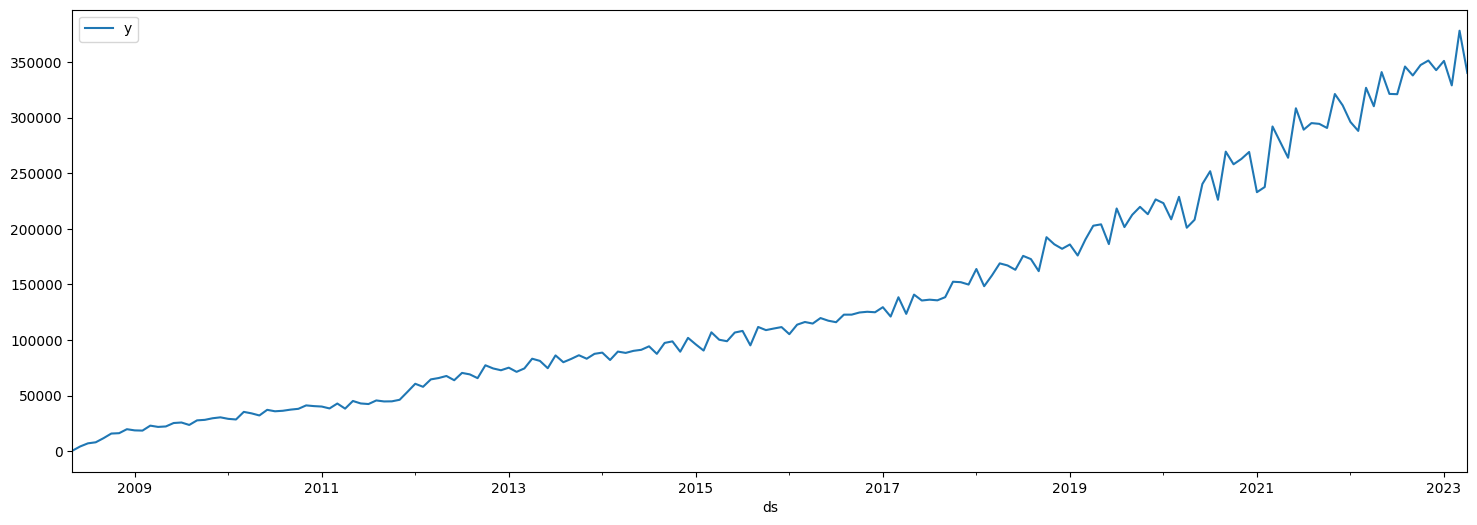

In [390]:
df.plot(x = 'ds', y = 'y', figsize = (18,6))

In [392]:
train = df.iloc[:len(df)-50]
actual_test = df.iloc[len(df)-50:]

In [449]:
train

,ds,y
0,2008-05-31,333.51
1,2008-06-30,4160.00
2,2008-07-31,6977.00
3,2008-08-31,7920.00
4,2008-09-30,11624.00
...,...,...
125,2018-10-31,192455.00
126,2018-11-30,186055.00
127,2018-12-31,182015.00
128,2019-01-31,185902.00


In [450]:
actual_test

,ds,y
130,2019-03-31,190488.0
131,2019-04-30,202776.0
132,2019-05-31,204019.0
133,2019-06-30,186246.0
134,2019-07-31,218281.0
135,2019-08-31,201556.0
136,2019-09-30,212595.0
137,2019-10-31,219753.0
138,2019-11-30,213140.0
139,2019-12-31,226439.0


**Start making predictions**

In [451]:
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet


In [452]:
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(periods=50, freq='M')
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/udub83im.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ixj4wuid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79415', 'data', 'file=/tmp/tmpfxjycev6/udub83im.json', 'init=/tmp/tmpfxjycev6/ixj4wuid.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelp8xysbmd/prophet_model-20230608125411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [455]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-05-31,7955.204407,3727.265084,14262.467316,7955.204407,7955.204407,855.165160,855.165160,855.165160,855.165160,855.165160,855.165160,0.0,0.0,0.0,8810.369567
1,2008-06-30,9024.850664,809.259694,12087.597995,9024.850664,9024.850664,-2660.064745,-2660.064745,-2660.064745,-2660.064745,-2660.064745,-2660.064745,0.0,0.0,0.0,6364.785920
2,2008-07-31,10130.151797,4178.344845,15145.540214,10130.151797,10130.151797,-268.015643,-268.015643,-268.015643,-268.015643,-268.015643,-268.015643,0.0,0.0,0.0,9862.136154
3,2008-08-31,11235.452930,5382.850446,16115.386057,11235.452930,11235.452930,-706.362095,-706.362095,-706.362095,-706.362095,-706.362095,-706.362095,0.0,0.0,0.0,10529.090835
4,2008-09-30,12305.099187,4547.988571,15174.976662,12305.099187,12305.099187,-2468.848076,-2468.848076,-2468.848076,-2468.848076,-2468.848076,-2468.848076,0.0,0.0,0.0,9836.251111


In [456]:
final_forecast = forecast[['ds','yhat','yhat_lower','yhat_upper']]

In [457]:
final_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2008-05-31,8810.369567,3727.265084,14262.467316
1,2008-06-30,6364.785920,809.259694,12087.597995
2,2008-07-31,9862.136154,4178.344845,15145.540214
3,2008-08-31,10529.090835,5382.850446,16115.386057
4,2008-09-30,9836.251111,4547.988571,15174.976662
...,...,...,...,...
175,2022-12-31,290060.705960,280275.731098,299830.556516
176,2023-01-31,292016.474626,281662.024468,302520.802656
177,2023-02-28,286910.384621,276356.580982,296895.323729
178,2023-03-31,298614.320947,288179.737987,308610.534986


In [458]:
plot_plotly(model,forecast)

**Seasonal components**

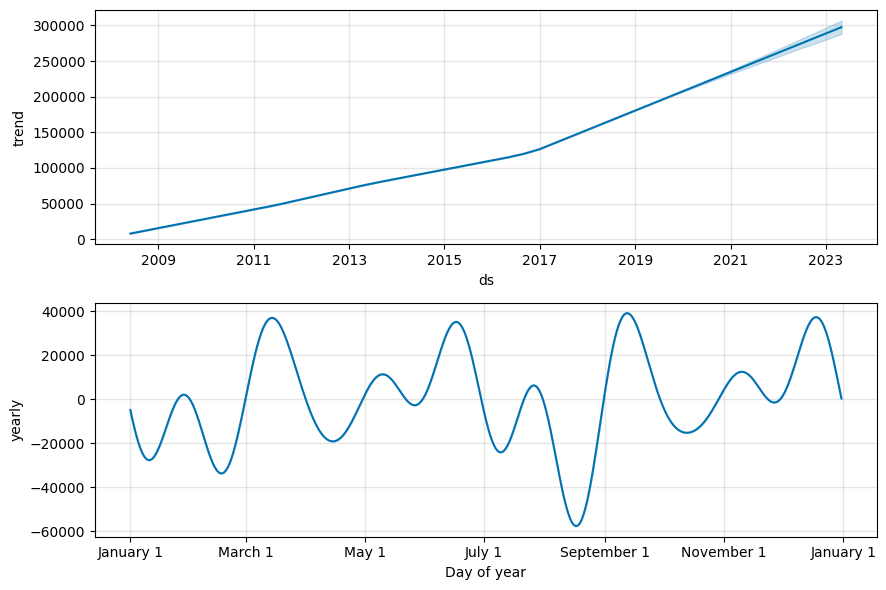

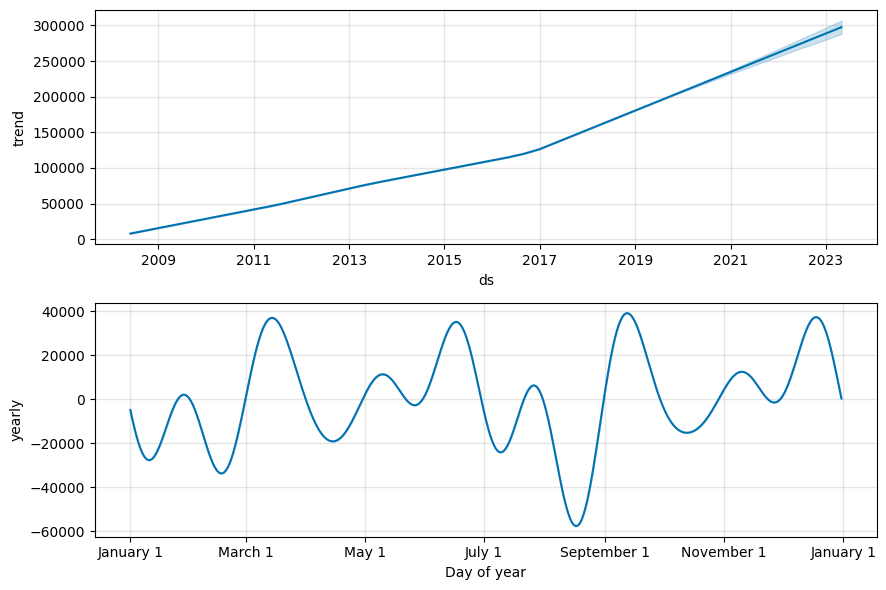

In [459]:
model.plot_components(forecast)

In [462]:
test_validation = pd.merge(actual_test,final_forecast , how='left',on='ds')

In [463]:
test_validation

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-03-31,190488.0,190447.169379,185153.752140,195815.545280
1,2019-04-30,202776.0,188591.655715,183268.787678,193839.663747
2,2019-05-31,204019.0,191445.926209,186065.225428,196766.372326
3,2019-06-30,186246.0,194265.637688,189126.473471,199493.853333
4,2019-07-31,218281.0,197812.640668,192375.314074,203777.540824
5,2019-08-31,201556.0,193362.338560,187825.813336,198667.604096
6,2019-09-30,212595.0,199929.801217,194681.766954,205703.397838
7,2019-10-31,219753.0,205181.938023,199640.159590,210732.494208
8,2019-11-30,213140.0,205015.570226,199319.536994,210396.408381
9,2019-12-31,226439.0,210005.602223,204555.823484,215253.666008


In [464]:
test_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          50 non-null     datetime64[ns]
 1   y           50 non-null     float64       
 2   yhat        50 non-null     float64       
 3   yhat_lower  50 non-null     float64       
 4   yhat_upper  50 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.3 KB


<Axes: xlabel='ds'>

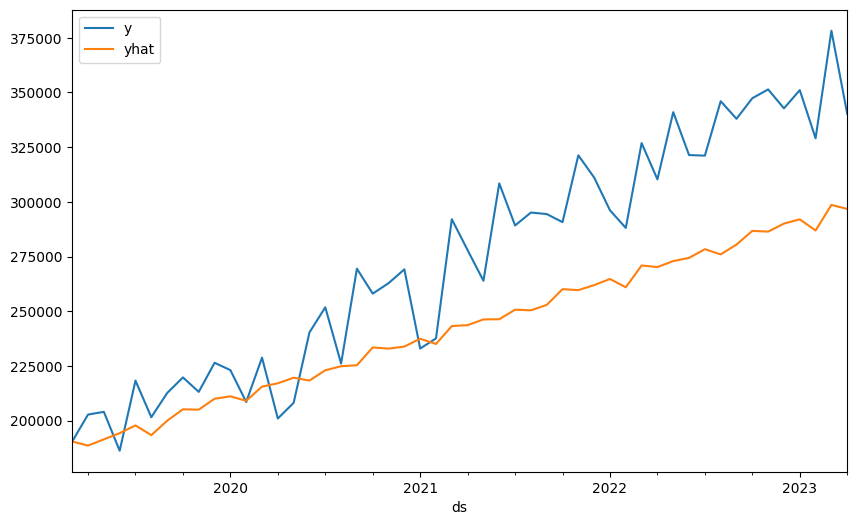

In [465]:
test_validation.plot(x = 'ds', y = ['y','yhat'], figsize = (10,6))

**The  model seems to be not very good .The models didnt capture   the seasonality and cyclicity  with in the data .Hence its is necessary to hyper parameter tune**

**Evaluating the model performance**

In [466]:
from statsmodels.tools.eval_measures  import rmse
from sklearn.metrics import mean_absolute_percentage_error

In [467]:
predictions = forecast.iloc[-50:]['yhat']

In [468]:
print('root mean square error between  actual and predicted values:', rmse(predictions,actual_test['y']))

root mean square error between  actual and predicted values: 38974.427165787


In [469]:
print('the mean value of the test data set :',actual_test['y'].mean())

the mean value of the test data set : 273324.08


In [470]:
rmse(predictions,actual_test['y'])/actual_test['y'].mean() * 100

14.259419501489583

**HYPER PARAMETER TUNING**




In [476]:
import holidays

In [477]:
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=range(2008,2025)).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "UK-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

<ipython-input-477-03e7a870ade3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-477-03e7a870ade3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-477-03e7a870ade3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-477-03e7a870ade3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-477-03e7a870ade3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-477-03e7a870ade3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [478]:
holiday

,ds,holiday
0,2008-01-01,UK-Holidays
1,2008-01-21,UK-Holidays
2,2008-02-18,UK-Holidays
3,2008-05-26,UK-Holidays
4,2008-07-04,UK-Holidays
...,...,...
190,2024-09-02,UK-Holidays
191,2024-10-14,UK-Holidays
192,2024-11-11,UK-Holidays
193,2024-11-28,UK-Holidays


In [483]:
from sklearn.model_selection import ParameterGrid
import random
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)
print('grid:',grid)

Total Possible Models 150
grid: <sklearn.model_selection._search.ParameterGrid object at 0x7f6f11f3c100>


In [484]:
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
    train_model.add_country_holidays(country_name='UK')
    train_model.fit(train)
    train_forecast = train_model.make_future_dataframe(periods=50, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test = train_forecast[['ds','yhat']]
    MAPE = mean_absolute_percentage_error(actual_test['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4kn8ng2t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/eqdh_5kn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54240', 'data', 'file=/tmp/tmpfxjycev6/4kn8ng2t.json', 'init=/tmp/tmpfxjycev6/eqdh_5kn.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeltb_bq6n6/prophet_model-20230608130845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/e8b71rye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/srm8lcfa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13243', 'data', 'file=/tmp/tmpfxjycev6/e8b71rye.json', 'init=/tmp/tmpfxjycev6/srm8lcfa.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelpd5ibu_t/prophet_model-20230608130846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0749232647976607
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:08:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/0r_kimiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_nqpk0li.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1046', 'data', 'file=/tmp/tmpfxjycev6/0r_kimiq.json', 'init=/tmp/tmpfxjycev6/_nqpk0li.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelrkzzutar/prophet_model-20230608130846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proces

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09274887910577605
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/wxe4fq8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/to2xgc52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55203', 'data', 'file=/tmp/tmpfxjycev6/wxe4fq8s.json', 'init=/tmp/tmpfxjycev6/to2xgc52.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modellsyc5j1k/prophet_model-20230608130848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07487022627407108
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:08:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/5gh_ttc2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ki0otvsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97956', 'data', 'file=/tmp/tmpfxjycev6/5gh_ttc2.json', 'init=/tmp/tmpfxjycev6/ki0otvsj.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelszr2x9qe/prophet_model-20230608130848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09203560496034148
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:08:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4tuzkmru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/utczigl9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11084', 'data', 'file=/tmp/tmpfxjycev6/4tuzkmru.json', 'init=/tmp/tmpfxjycev6/utczigl9.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelcx5do0sa/prophet_model-20230608130849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07487022627407108
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:08:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/hiy2ffka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/owcasxr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17296', 'data', 'file=/tmp/tmpfxjycev6/hiy2ffka.json', 'init=/tmp/tmpfxjycev6/owcasxr8.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelsmw53_19/prophet_model-20230608130850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09203560496034148
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/hi3q9gop.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/jvl84dwd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5681', 'data', 'file=/tmp/tmpfxjycev6/hi3q9gop.json', 'init=/tmp/tmpfxjycev6/jvl84dwd.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelc13rmsvq/prophet_model-20230608130852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07582038126376985
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:08:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/md4a0ga5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/sqf2fbns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54806', 'data', 'file=/tmp/tmpfxjycev6/md4a0ga5.json', 'init=/tmp/tmpfxjycev6/sqf2fbns.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model8mwzbnic/prophet_model-20230608130852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09300344571314761
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:08:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/yx5xmiv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/87r6xmfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12402', 'data', 'file=/tmp/tmpfxjycev6/yx5xmiv2.json', 'init=/tmp/tmpfxjycev6/87r6xmfr.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeljt5d4t3f/prophet_model-20230608130854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07578805136214922
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/kkpgydt2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/fjrk2j3a.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0930691725310116
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13724', 'data', 'file=/tmp/tmpfxjycev6/kkpgydt2.json', 'init=/tmp/tmpfxjycev6/fjrk2j3a.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model30w4hia6/prophet_model-20230608130855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/eikk08cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ut56v07k

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07578805136214922
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:08:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1twgytit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/c3wv9ix6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53792', 'data', 'file=/tmp/tmpfxjycev6/1twgytit.json', 'init=/tmp/tmpfxjycev6/c3wv9ix6.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelo28mac7e/prophet_model-20230608130857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0930691725310116
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/wevcjrx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/fwg8n6g4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52059', 'data', 'file=/tmp/tmpfxjycev6/wevcjrx7.json', 'init=/tmp/tmpfxjycev6/fwg8n6g4.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelsk4bc9y_/prophet_model-20230608130858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07647530683936438
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_n2mii5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/dt7jie20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13040', 'data', 'file=/tmp/tmpfxjycev6/_n2mii5w.json', 'init=/tmp/tmpfxjycev6/dt7jie20.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelqj1_1cqf/prophet_model-20230608130858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09245352371321246
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/nrb7ovyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/cro1sviv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91327', 'data', 'file=/tmp/tmpfxjycev6/nrb7ovyn.json', 'init=/tmp/tmpfxjycev6/cro1sviv.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model6zuilhtr/prophet_model-20230608130859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07619325129142357
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4nsbm25m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/y9oawsbx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42950', 'data', 'file=/tmp/tmpfxjycev6/4nsbm25m.json', 'init=/tmp/tmpfxjycev6/y9oawsbx.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modely15t8gjm/prophet_model-20230608130900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09255309103814038
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6shkr8_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6k7k2nr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64705', 'data', 'file=/tmp/tmpfxjycev6/6shkr8_h.json', 'init=/tmp/tmpfxjycev6/6k7k2nr2.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelnorr7k0y/prophet_model-20230608130901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07619325129142357
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/c__oeuzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1t86z504.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94899', 'data', 'file=/tmp/tmpfxjycev6/c__oeuzf.json', 'init=/tmp/tmpfxjycev6/1t86z504.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model_di5uq95/prophet_model-20230608130901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09255309103814038
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/cxiotw2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/h0etua8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26115', 'data', 'file=/tmp/tmpfxjycev6/cxiotw2d.json', 'init=/tmp/tmpfxjycev6/h0etua8y.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelt7q79dze/prophet_model-20230608130902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0766807856176494
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/t5ns9x5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/g24xhpwy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34857', 'data', 'file=/tmp/tmpfxjycev6/t5ns9x5o.json', 'init=/tmp/tmpfxjycev6/g24xhpwy.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelogpzg565/prophet_model-20230608130903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09262119450656345
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/akct3ei7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/o610v_mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19690', 'data', 'file=/tmp/tmpfxjycev6/akct3ei7.json', 'init=/tmp/tmpfxjycev6/o610v_mm.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeleb7nzff4/prophet_model-20230608130904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07568240880292933
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ot6dpyhb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/w888jaie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73569', 'data', 'file=/tmp/tmpfxjycev6/ot6dpyhb.json', 'init=/tmp/tmpfxjycev6/w888jaie.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model6swdnhd4/prophet_model-20230608130904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09217624232968268
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/yvp2oulo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/sryfg9lo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9716', 'data', 'file=/tmp/tmpfxjycev6/yvp2oulo.json', 'init=/tmp/tmpfxjycev6/sryfg9lo.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelp3o6lfbd/prophet_model-20230608130906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proces

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07568240880292933
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/x6l4lwn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/cxhbzt0u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84097', 'data', 'file=/tmp/tmpfxjycev6/x6l4lwn5.json', 'init=/tmp/tmpfxjycev6/cxhbzt0u.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model0wa56k_k/prophet_model-20230608130907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09217624232968268
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/85igmb8j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/vszm0vor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12319', 'data', 'file=/tmp/tmpfxjycev6/85igmb8j.json', 'init=/tmp/tmpfxjycev6/vszm0vor.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeltwe25eu_/prophet_model-20230608130908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07598483394046737
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/lflij9j5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/eovtk7o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59667', 'data', 'file=/tmp/tmpfxjycev6/lflij9j5.json', 'init=/tmp/tmpfxjycev6/eovtk7o2.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelsn2qxgbs/prophet_model-20230608130909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09226764403608065
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/43t3d882.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4_qdgcyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77857', 'data', 'file=/tmp/tmpfxjycev6/43t3d882.json', 'init=/tmp/tmpfxjycev6/4_qdgcyk.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelsbnxq5hb/prophet_model-20230608130911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07640202349039028
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/lcklzv1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/dl8pd7y4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10029', 'data', 'file=/tmp/tmpfxjycev6/lcklzv1t.json', 'init=/tmp/tmpfxjycev6/dl8pd7y4.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelk71c6ixw/prophet_model-20230608130912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09286376009488566
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/gmov56rw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ax44we5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79071', 'data', 'file=/tmp/tmpfxjycev6/gmov56rw.json', 'init=/tmp/tmpfxjycev6/ax44we5g.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model4regp3pk/prophet_model-20230608130913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07640202349039028
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1gk4pisd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8v0fdy_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89022', 'data', 'file=/tmp/tmpfxjycev6/1gk4pisd.json', 'init=/tmp/tmpfxjycev6/8v0fdy_2.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model5dvg94i_/prophet_model-20230608130913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.09286376009488566
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/dcdvyyiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8p36tj3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19795', 'data', 'file=/tmp/tmpfxjycev6/dcdvyyiq.json', 'init=/tmp/tmpfxjycev6/8p36tj3s.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelpx89cu40/prophet_model-20230608130914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07353797176744056
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/nts3mi8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_2m7toc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37238', 'data', 'file=/tmp/tmpfxjycev6/nts3mi8p.json', 'init=/tmp/tmpfxjycev6/_2m7toc3.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model_9t5hof4/prophet_model-20230608130915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08912296545669689
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6d5ppnmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/op04h3a5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28836', 'data', 'file=/tmp/tmpfxjycev6/6d5ppnmz.json', 'init=/tmp/tmpfxjycev6/op04h3a5.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelyrjt2vh3/prophet_model-20230608130916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07337200267801784
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/wvr824pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/9383bw9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40546', 'data', 'file=/tmp/tmpfxjycev6/wvr824pq.json', 'init=/tmp/tmpfxjycev6/9383bw9w.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelwx1vvq28/prophet_model-20230608130917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08919844981248765
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/l25o8xma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/lvv8ysi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67212', 'data', 'file=/tmp/tmpfxjycev6/l25o8xma.json', 'init=/tmp/tmpfxjycev6/lvv8ysi3.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelolov0vyh/prophet_model-20230608130918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07337200267801784
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/fyl2n7u1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ej2yghd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14591', 'data', 'file=/tmp/tmpfxjycev6/fyl2n7u1.json', 'init=/tmp/tmpfxjycev6/ej2yghd8.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelmrb8iqzc/prophet_model-20230608130919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08919844981248765
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/0p4ww1l2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/i7r7vdrm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=789', 'data', 'file=/tmp/tmpfxjycev6/0p4ww1l2.json', 'init=/tmp/tmpfxjycev6/i7r7vdrm.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeluali6ds5/prophet_model-20230608130920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07434769207867493
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/z7yypajj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/i1mazihx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99027', 'data', 'file=/tmp/tmpfxjycev6/z7yypajj.json', 'init=/tmp/tmpfxjycev6/i1mazihx.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model2sv2jkhq/prophet_model-20230608130920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08917780061717748
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/gqtpceeg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/5wbntl6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73739', 'data', 'file=/tmp/tmpfxjycev6/gqtpceeg.json', 'init=/tmp/tmpfxjycev6/5wbntl6w.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model5zblgerg/prophet_model-20230608130921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07457320609526509
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/zj16kegh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/hrt7qeb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27361', 'data', 'file=/tmp/tmpfxjycev6/zj16kegh.json', 'init=/tmp/tmpfxjycev6/hrt7qeb1.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelqnd7p3__/prophet_model-20230608130922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08915141738720381
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/k3aaife9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/tlyd9wsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07457320609526509
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35619', 'data', 'file=/tmp/tmpfxjycev6/k3aaife9.json', 'init=/tmp/tmpfxjycev6/tlyd9wsb.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeldj_qumi_/prophet_model-20230608130924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8idjujwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/og_s7q00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-package

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08915141738720381
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/e199ktgv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/khe0d3y7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84977', 'data', 'file=/tmp/tmpfxjycev6/e199ktgv.json', 'init=/tmp/tmpfxjycev6/khe0d3y7.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelabkkrp0y/prophet_model-20230608130927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0749065525180055
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/45y2_az6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/t4j3pfyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48898', 'data', 'file=/tmp/tmpfxjycev6/45y2_az6.json', 'init=/tmp/tmpfxjycev6/t4j3pfyz.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model3ghixb34/prophet_model-20230608130928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.089265178075003
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


INFO:cmdstanpy:Chain [1] start processing
13:09:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/zrdbzf5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/xkbh3h7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66296', 'data', 'file=/tmp/tmpfxjycev6/zrdbzf5a.json', 'init=/tmp/tmpfxjycev6/xkbh3h7b.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model7zyzm97_/prophet_model-20230608130929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:29 - cmdstanpy - INFO - Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07483738100745399
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/r8qg156g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/mz7k161s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65035', 'data', 'file=/tmp/tmpfxjycev6/r8qg156g.json', 'init=/tmp/tmpfxjycev6/mz7k161s.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelk5angigz/prophet_model-20230608130929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08870832480570363
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/u69inmrs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/vn8_nbd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16266', 'data', 'file=/tmp/tmpfxjycev6/u69inmrs.json', 'init=/tmp/tmpfxjycev6/vn8_nbd_.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelq8qctxco/prophet_model-20230608130931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07483738100745399
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/vnaaph0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/qpkhn6gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91947', 'data', 'file=/tmp/tmpfxjycev6/vnaaph0_.json', 'init=/tmp/tmpfxjycev6/qpkhn6gn.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model18xypluk/prophet_model-20230608130931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08870832480570363
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/2m516bsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/gk_5f342.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23137', 'data', 'file=/tmp/tmpfxjycev6/2m516bsk.json', 'init=/tmp/tmpfxjycev6/gk_5f342.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelnq5f7ude/prophet_model-20230608130932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07492885539747586
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ubszr93o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/35aa5mw9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58162', 'data', 'file=/tmp/tmpfxjycev6/ubszr93o.json', 'init=/tmp/tmpfxjycev6/35aa5mw9.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelseflvsof/prophet_model-20230608130933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0895819930522646
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/lui9j380.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4oxecbsi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11067', 'data', 'file=/tmp/tmpfxjycev6/lui9j380.json', 'init=/tmp/tmpfxjycev6/4oxecbsi.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelg1fdpbgg/prophet_model-20230608130934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07489110218862369
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/dkfeh73w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/2st8lwm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37483', 'data', 'file=/tmp/tmpfxjycev6/dkfeh73w.json', 'init=/tmp/tmpfxjycev6/2st8lwm2.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelpa_k7m90/prophet_model-20230608130934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08926884484260456
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8ga3bjy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1dnwg4r4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39395', 'data', 'file=/tmp/tmpfxjycev6/8ga3bjy8.json', 'init=/tmp/tmpfxjycev6/1dnwg4r4.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelwyp2a3k4/prophet_model-20230608130935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07489110218862369
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/c6zgphy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/sa_nzvz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42560', 'data', 'file=/tmp/tmpfxjycev6/c6zgphy8.json', 'init=/tmp/tmpfxjycev6/sa_nzvz1.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modele224a8_y/prophet_model-20230608130936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08926884484260456
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/06e6sfq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/vy85pf5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21266', 'data', 'file=/tmp/tmpfxjycev6/06e6sfq9.json', 'init=/tmp/tmpfxjycev6/vy85pf5_.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model43geeb_h/prophet_model-20230608130937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07502649195877843
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/y6fs3w5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/npy3jckj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51833', 'data', 'file=/tmp/tmpfxjycev6/y6fs3w5n.json', 'init=/tmp/tmpfxjycev6/npy3jckj.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelny20gq8x/prophet_model-20230608130938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08915309946098926
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8agpc1po.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07503300477434358
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/11upof9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5217', 'data', 'file=/tmp/tmpfxjycev6/8agpc1po.json', 'init=/tmp/tmpfxjycev6/11upof9a.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelptwae9_9/prophet_model-20230608130939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/0v8ndyb4.

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08874788734052588
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/72sqn3q1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ghp7srj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81757', 'data', 'file=/tmp/tmpfxjycev6/72sqn3q1.json', 'init=/tmp/tmpfxjycev6/ghp7srj4.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model14ikt262/prophet_model-20230608130942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07503300477434358
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/l1qynnn1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/s93mjdqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51041', 'data', 'file=/tmp/tmpfxjycev6/l1qynnn1.json', 'init=/tmp/tmpfxjycev6/s93mjdqz.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model28_qjkbq/prophet_model-20230608130943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08874788734052588
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/98vbtuy4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ho2l6ldm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82888', 'data', 'file=/tmp/tmpfxjycev6/98vbtuy4.json', 'init=/tmp/tmpfxjycev6/ho2l6ldm.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeljiy0vtk5/prophet_model-20230608130945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07279775726497296
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/pml5s04_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6yv6lbbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30596', 'data', 'file=/tmp/tmpfxjycev6/pml5s04_.json', 'init=/tmp/tmpfxjycev6/6yv6lbbj.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelyn2c3b5e/prophet_model-20230608130945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08673917194350228
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ag6ct8wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/agwjpwqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62219', 'data', 'file=/tmp/tmpfxjycev6/ag6ct8wk.json', 'init=/tmp/tmpfxjycev6/agwjpwqb.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model3d5v_kwn/prophet_model-20230608130946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07285776843804341
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/lmo9l9kp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/2vfbu7lt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44947', 'data', 'file=/tmp/tmpfxjycev6/lmo9l9kp.json', 'init=/tmp/tmpfxjycev6/2vfbu7lt.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelwdlr7dgh/prophet_model-20230608130947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08646511052193677
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/vwld8g_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/79ruwrp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57995', 'data', 'file=/tmp/tmpfxjycev6/vwld8g_5.json', 'init=/tmp/tmpfxjycev6/79ruwrp7.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modela_bempnk/prophet_model-20230608130948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07285776843804341
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/b7wvg4ri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/col21djy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27232', 'data', 'file=/tmp/tmpfxjycev6/b7wvg4ri.json', 'init=/tmp/tmpfxjycev6/col21djy.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeltrm032i5/prophet_model-20230608130949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08646511052193677
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/gzdw40fl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/jymn0qxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18116', 'data', 'file=/tmp/tmpfxjycev6/gzdw40fl.json', 'init=/tmp/tmpfxjycev6/jymn0qxc.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model1pbvgv88/prophet_model-20230608130950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0732278506397297
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/vd1mqxlt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/q6wubjkg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94891', 'data', 'file=/tmp/tmpfxjycev6/vd1mqxlt.json', 'init=/tmp/tmpfxjycev6/q6wubjkg.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model072wgiqs/prophet_model-20230608130951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08620534114921227
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6zjtsya2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/73hh8x5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71903', 'data', 'file=/tmp/tmpfxjycev6/6zjtsya2.json', 'init=/tmp/tmpfxjycev6/73hh8x5i.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelm5p89ctv/prophet_model-20230608130952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07352425138831731
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_1w8k27y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/rdm1rxv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30194', 'data', 'file=/tmp/tmpfxjycev6/_1w8k27y.json', 'init=/tmp/tmpfxjycev6/rdm1rxv0.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeloqfkxlwb/prophet_model-20230608130952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0866655087041716
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1vh4ypcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/i_f8vb0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84801', 'data', 'file=/tmp/tmpfxjycev6/1vh4ypcn.json', 'init=/tmp/tmpfxjycev6/i_f8vb0l.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelkngyu6ja/prophet_model-20230608130953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07352425138831731
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/i61gw73d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6u7iu5xb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61195', 'data', 'file=/tmp/tmpfxjycev6/i61gw73d.json', 'init=/tmp/tmpfxjycev6/6u7iu5xb.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model00gamz_q/prophet_model-20230608130954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0866655087041716
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:09:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/9jjfesth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_qvd0unj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37531', 'data', 'file=/tmp/tmpfxjycev6/9jjfesth.json', 'init=/tmp/tmpfxjycev6/_qvd0unj.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelq632b9gb/prophet_model-20230608130956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07401587193144434
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:09:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4z2qrjds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/7sdigmo4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99982', 'data', 'file=/tmp/tmpfxjycev6/4z2qrjds.json', 'init=/tmp/tmpfxjycev6/7sdigmo4.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelx6hu0ki_/prophet_model-20230608130957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08668636597612539
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:09:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/5_tg996_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8ydjo1bl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80714', 'data', 'file=/tmp/tmpfxjycev6/5_tg996_.json', 'init=/tmp/tmpfxjycev6/8ydjo1bl.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model9_djkka6/prophet_model-20230608130959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07388754925080122
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8fk8hv84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/0x8_jzxt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25945', 'data', 'file=/tmp/tmpfxjycev6/8fk8hv84.json', 'init=/tmp/tmpfxjycev6/0x8_jzxt.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelrtecq4n4/prophet_model-20230608131000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08665111893283793
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/2dz9cbcq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6sacdysu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30167', 'data', 'file=/tmp/tmpfxjycev6/2dz9cbcq.json', 'init=/tmp/tmpfxjycev6/6sacdysu.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelz39f0ags/prophet_model-20230608131001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07388754925080122
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/my491q5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/nnmxlt4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13683', 'data', 'file=/tmp/tmpfxjycev6/my491q5n.json', 'init=/tmp/tmpfxjycev6/nnmxlt4v.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelq6x97zo9/prophet_model-20230608131002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08665111893283793
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/3zao8p75.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/d96xgdxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85437', 'data', 'file=/tmp/tmpfxjycev6/3zao8p75.json', 'init=/tmp/tmpfxjycev6/d96xgdxy.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model611r8qy1/prophet_model-20230608131003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07434254143361609
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/qcnw4_aa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/cnao04bx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71141', 'data', 'file=/tmp/tmpfxjycev6/qcnw4_aa.json', 'init=/tmp/tmpfxjycev6/cnao04bx.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model5jdk_rm0/prophet_model-20230608131004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08668093376463071
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8cjxvvmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_4_8jnub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54054', 'data', 'file=/tmp/tmpfxjycev6/8cjxvvmf.json', 'init=/tmp/tmpfxjycev6/_4_8jnub.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model6o9hn9_x/prophet_model-20230608131005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07423583902070557
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/2h1xcjjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/x0qvld18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17483', 'data', 'file=/tmp/tmpfxjycev6/2h1xcjjo.json', 'init=/tmp/tmpfxjycev6/x0qvld18.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelqfcplqjv/prophet_model-20230608131005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08647687188896586
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/n66ugvch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/52l61zev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71943', 'data', 'file=/tmp/tmpfxjycev6/n66ugvch.json', 'init=/tmp/tmpfxjycev6/52l61zev.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeloxwbt89o/prophet_model-20230608131006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07423583902070557
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/5pvrhykx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1b2_m5b6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84814', 'data', 'file=/tmp/tmpfxjycev6/5pvrhykx.json', 'init=/tmp/tmpfxjycev6/1b2_m5b6.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelvcdi5op1/prophet_model-20230608131007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08647687188896586
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/moq_rv2r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4t2bxrjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58970', 'data', 'file=/tmp/tmpfxjycev6/moq_rv2r.json', 'init=/tmp/tmpfxjycev6/4t2bxrjp.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model_56q3o_k/prophet_model-20230608131008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07430779875653994
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/j0zy25eu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/mvthm4ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46353', 'data', 'file=/tmp/tmpfxjycev6/j0zy25eu.json', 'init=/tmp/tmpfxjycev6/mvthm4ds.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelm2_wncdx/prophet_model-20230608131009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0867116723512515
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/hy33263g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/kuyzwtfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70668', 'data', 'file=/tmp/tmpfxjycev6/hy33263g.json', 'init=/tmp/tmpfxjycev6/kuyzwtfr.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model0y0dcbcs/prophet_model-20230608131010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07391004935534798
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/orl_xl08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/e1qvqplk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29321', 'data', 'file=/tmp/tmpfxjycev6/orl_xl08.json', 'init=/tmp/tmpfxjycev6/e1qvqplk.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelbiydca6l/prophet_model-20230608131011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0864316152322892
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ubh4oce4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/hcu9jzuq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41473', 'data', 'file=/tmp/tmpfxjycev6/ubh4oce4.json', 'init=/tmp/tmpfxjycev6/hcu9jzuq.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelkqt9afqm/prophet_model-20230608131013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07391004935534798
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4k47qcgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/7qi4lifj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42046', 'data', 'file=/tmp/tmpfxjycev6/4k47qcgo.json', 'init=/tmp/tmpfxjycev6/7qi4lifj.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelqqxw15hi/prophet_model-20230608131014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0864316152322892
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/sd1o70r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/eau85vfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28106', 'data', 'file=/tmp/tmpfxjycev6/sd1o70r1.json', 'init=/tmp/tmpfxjycev6/eau85vfp.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model_q6vfaqp/prophet_model-20230608131015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07192623049000495
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/0rnon4t8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ve66ekin.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08506285406012344
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46946', 'data', 'file=/tmp/tmpfxjycev6/0rnon4t8.json', 'init=/tmp/tmpfxjycev6/ve66ekin.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelgcejl2vv/prophet_model-20230608131017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/885ypncl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1q32_8m4

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07165864515093395
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_41skuew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ldkl57i_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48944', 'data', 'file=/tmp/tmpfxjycev6/_41skuew.json', 'init=/tmp/tmpfxjycev6/ldkl57i_.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelmnvjcowu/prophet_model-20230608131019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08499378531873561
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/k_lfjzx6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/yhkxxpqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69989', 'data', 'file=/tmp/tmpfxjycev6/k_lfjzx6.json', 'init=/tmp/tmpfxjycev6/yhkxxpqh.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeloo3pixd_/prophet_model-20230608131020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07165864515093395
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/km02zj2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/taczd274.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94031', 'data', 'file=/tmp/tmpfxjycev6/km02zj2x.json', 'init=/tmp/tmpfxjycev6/taczd274.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelsq6g7sr9/prophet_model-20230608131020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08499378531873561
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/mc4r21aw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/q2kfka23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95283', 'data', 'file=/tmp/tmpfxjycev6/mc4r21aw.json', 'init=/tmp/tmpfxjycev6/q2kfka23.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model1nav5sa5/prophet_model-20230608131021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07265751688195615
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/uxp0i42w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/drk_s_5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6163', 'data', 'file=/tmp/tmpfxjycev6/uxp0i42w.json', 'init=/tmp/tmpfxjycev6/drk_s_5f.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelc_7_6hj5/prophet_model-20230608131022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proces

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08502178692390458
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/eawlv_mv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/67j5nmp2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16086', 'data', 'file=/tmp/tmpfxjycev6/eawlv_mv.json', 'init=/tmp/tmpfxjycev6/67j5nmp2.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelkj4rvdtg/prophet_model-20230608131023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07236995622863503
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/bizwwo4m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/oc176rcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94140', 'data', 'file=/tmp/tmpfxjycev6/bizwwo4m.json', 'init=/tmp/tmpfxjycev6/oc176rcj.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelnz8up7tp/prophet_model-20230608131024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08507373403302268
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/y817t122.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ifx2sq0s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82819', 'data', 'file=/tmp/tmpfxjycev6/y817t122.json', 'init=/tmp/tmpfxjycev6/ifx2sq0s.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelwuxhv1as/prophet_model-20230608131025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07236995622863503
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/qr8sbfs7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/bw95g_da.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36175', 'data', 'file=/tmp/tmpfxjycev6/qr8sbfs7.json', 'init=/tmp/tmpfxjycev6/bw95g_da.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model7pc6xzvq/prophet_model-20230608131026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08507373403302268
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/at7zb29q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1z53jd2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86033', 'data', 'file=/tmp/tmpfxjycev6/at7zb29q.json', 'init=/tmp/tmpfxjycev6/1z53jd2e.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelqk1yvoxt/prophet_model-20230608131027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07348170940084338
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/as9sbt98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4l0znge_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68912', 'data', 'file=/tmp/tmpfxjycev6/as9sbt98.json', 'init=/tmp/tmpfxjycev6/4l0znge_.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelahdxq4nv/prophet_model-20230608131028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08513972121345448
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/9gm0bcxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ow12lvcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80623', 'data', 'file=/tmp/tmpfxjycev6/9gm0bcxp.json', 'init=/tmp/tmpfxjycev6/ow12lvcu.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelqxrp95hc/prophet_model-20230608131030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07322136369798446
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6umkd4lq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/19cwie6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92065', 'data', 'file=/tmp/tmpfxjycev6/6umkd4lq.json', 'init=/tmp/tmpfxjycev6/19cwie6n.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelhpe5ya3k/prophet_model-20230608131031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08491322963723791
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/rx7ck84n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/c_228w2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36566', 'data', 'file=/tmp/tmpfxjycev6/rx7ck84n.json', 'init=/tmp/tmpfxjycev6/c_228w2n.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model9xm5zkf4/prophet_model-20230608131033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07322136369798446
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/b7zp3dio.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/9ogfakpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26779', 'data', 'file=/tmp/tmpfxjycev6/b7zp3dio.json', 'init=/tmp/tmpfxjycev6/9ogfakpn.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeldnpkjv99/prophet_model-20230608131034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08491322963723791
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/bt1_5osy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/qn5ssvnh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67641', 'data', 'file=/tmp/tmpfxjycev6/bt1_5osy.json', 'init=/tmp/tmpfxjycev6/qn5ssvnh.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelatjruxwh/prophet_model-20230608131035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07311357480704084
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/738wn3ad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ghz8hk0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22501', 'data', 'file=/tmp/tmpfxjycev6/738wn3ad.json', 'init=/tmp/tmpfxjycev6/ghz8hk0n.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelqwm1remb/prophet_model-20230608131035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08514499820442198
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ymds9we4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/qnf35e30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51771', 'data', 'file=/tmp/tmpfxjycev6/ymds9we4.json', 'init=/tmp/tmpfxjycev6/qnf35e30.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model_uvp6rvx/prophet_model-20230608131036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07389287945612386
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/fknupn7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/i0d49ko_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25979', 'data', 'file=/tmp/tmpfxjycev6/fknupn7y.json', 'init=/tmp/tmpfxjycev6/i0d49ko_.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelf_hkjgkn/prophet_model-20230608131037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08503867309143669
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/qdk22aio.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/rxeg1d94.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91830', 'data', 'file=/tmp/tmpfxjycev6/qdk22aio.json', 'init=/tmp/tmpfxjycev6/rxeg1d94.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model9yu4b96q/prophet_model-20230608131038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07389287945612386
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/u0p0t8dw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/l2yp6g81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9157', 'data', 'file=/tmp/tmpfxjycev6/u0p0t8dw.json', 'init=/tmp/tmpfxjycev6/l2yp6g81.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeldzuucw2u/prophet_model-20230608131039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08503867309143669
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/f4qs2kxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/3d97dsyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94031', 'data', 'file=/tmp/tmpfxjycev6/f4qs2kxo.json', 'init=/tmp/tmpfxjycev6/3d97dsyw.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model9iolei_6/prophet_model-20230608131040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07398399666870448
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/jb7ybpa7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/399gk7uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68523', 'data', 'file=/tmp/tmpfxjycev6/jb7ybpa7.json', 'init=/tmp/tmpfxjycev6/399gk7uy.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelwsci3km3/prophet_model-20230608131041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08503578197402899
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/bhltjo8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/simndf8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90142', 'data', 'file=/tmp/tmpfxjycev6/bhltjo8o.json', 'init=/tmp/tmpfxjycev6/simndf8c.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model08ffbwpg/prophet_model-20230608131042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0735756041083376
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/29hvovao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/i4nkd7fp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19168', 'data', 'file=/tmp/tmpfxjycev6/29hvovao.json', 'init=/tmp/tmpfxjycev6/i4nkd7fp.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelc8d5b6jp/prophet_model-20230608131042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08497540632341284
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/y_hwyo9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/f1_5i_pr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26610', 'data', 'file=/tmp/tmpfxjycev6/y_hwyo9z.json', 'init=/tmp/tmpfxjycev6/f1_5i_pr.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelf08zlka1/prophet_model-20230608131044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0735756041083376
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/0iyk429l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1q6gjrf4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60126', 'data', 'file=/tmp/tmpfxjycev6/0iyk429l.json', 'init=/tmp/tmpfxjycev6/1q6gjrf4.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelbs78p9an/prophet_model-20230608131045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08497540632341284
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/npp51ah_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/qea1zfsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57576', 'data', 'file=/tmp/tmpfxjycev6/npp51ah_.json', 'init=/tmp/tmpfxjycev6/qea1zfsy.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelwbcn8_pk/prophet_model-20230608131046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07113868570180563
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/84etde77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ng_4hsmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78819', 'data', 'file=/tmp/tmpfxjycev6/84etde77.json', 'init=/tmp/tmpfxjycev6/ng_4hsmi.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelvnrrozge/prophet_model-20230608131048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08401396767763104
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/leo_h6pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ozm52s8u.json


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07179871390792875
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5641', 'data', 'file=/tmp/tmpfxjycev6/leo_h6pe.json', 'init=/tmp/tmpfxjycev6/ozm52s8u.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelu384u7j2/prophet_model-20230608131050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/phlr0nqu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/chn881uo.

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08437231336229058
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/9v0jbmh8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/dyw13dz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8920', 'data', 'file=/tmp/tmpfxjycev6/9v0jbmh8.json', 'init=/tmp/tmpfxjycev6/dyw13dz1.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model0g4v__5w/prophet_model-20230608131052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proces

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07179871390792875
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/n8_rku8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/fa244ulk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96894', 'data', 'file=/tmp/tmpfxjycev6/n8_rku8l.json', 'init=/tmp/tmpfxjycev6/fa244ulk.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelfk3mtx82/prophet_model-20230608131052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08437231336229058
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/iqyqpfel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/bp5w8gli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31358', 'data', 'file=/tmp/tmpfxjycev6/iqyqpfel.json', 'init=/tmp/tmpfxjycev6/bp5w8gli.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelsq99e43a/prophet_model-20230608131053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07313430307028816
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/i1gzmesf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/wk_6bwqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20139', 'data', 'file=/tmp/tmpfxjycev6/i1gzmesf.json', 'init=/tmp/tmpfxjycev6/wk_6bwqv.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model97_osbcn/prophet_model-20230608131054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08438410050465178
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/mz2t_gmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ongxvxpq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91362', 'data', 'file=/tmp/tmpfxjycev6/mz2t_gmf.json', 'init=/tmp/tmpfxjycev6/ongxvxpq.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelnl719b58/prophet_model-20230608131055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07240895530488972
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/ewbi7vfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/gr3_lda0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40742', 'data', 'file=/tmp/tmpfxjycev6/ewbi7vfr.json', 'init=/tmp/tmpfxjycev6/gr3_lda0.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelljkedgbc/prophet_model-20230608131056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08441558054979895
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/l_d4tlka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/evjvchyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96168', 'data', 'file=/tmp/tmpfxjycev6/l_d4tlka.json', 'init=/tmp/tmpfxjycev6/evjvchyu.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelixdjcvbq/prophet_model-20230608131057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07240895530488972
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/8b7h7mtg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/7zridrfn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56385', 'data', 'file=/tmp/tmpfxjycev6/8b7h7mtg.json', 'init=/tmp/tmpfxjycev6/7zridrfn.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model98e0zz06/prophet_model-20230608131058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08441558054979895
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/6hu12av7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/c73ek8_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98672', 'data', 'file=/tmp/tmpfxjycev6/6hu12av7.json', 'init=/tmp/tmpfxjycev6/c73ek8_n.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model57qxf4hg/prophet_model-20230608131059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07262782375519629
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_grwc8qu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/umfrm3gi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36466', 'data', 'file=/tmp/tmpfxjycev6/_grwc8qu.json', 'init=/tmp/tmpfxjycev6/umfrm3gi.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelk7cfr76q/prophet_model-20230608131059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08413662462209677
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/20t7yz70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/mux4nigy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25773', 'data', 'file=/tmp/tmpfxjycev6/20t7yz70.json', 'init=/tmp/tmpfxjycev6/mux4nigy.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelfsz7ow5m/prophet_model-20230608131101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07316599135663163
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/_89nwf81.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/69bjme09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89286', 'data', 'file=/tmp/tmpfxjycev6/_89nwf81.json', 'init=/tmp/tmpfxjycev6/69bjme09.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelbaipzvtx/prophet_model-20230608131102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08448209829285132
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1jwhvfz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/x94m6w_s.json
DEBUG:cmdstanpy:idx 0


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07316599135663163
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26841', 'data', 'file=/tmp/tmpfxjycev6/1jwhvfz0.json', 'init=/tmp/tmpfxjycev6/x94m6w_s.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeljuc445zi/prophet_model-20230608131104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/g_a9ns2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/p_4znn7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:Cmd

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08448209829285132
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/65t2j6e7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/c65oxzbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92513', 'data', 'file=/tmp/tmpfxjycev6/65t2j6e7.json', 'init=/tmp/tmpfxjycev6/c65oxzbt.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelis29bri2/prophet_model-20230608131107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07343523448342683
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/5_bi8r18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/89sdw71q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57814', 'data', 'file=/tmp/tmpfxjycev6/5_bi8r18.json', 'init=/tmp/tmpfxjycev6/89sdw71q.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeljokrro1r/prophet_model-20230608131107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08371422238223049
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/fz4i7d0j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/1bizok6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20068', 'data', 'file=/tmp/tmpfxjycev6/fz4i7d0j.json', 'init=/tmp/tmpfxjycev6/1bizok6k.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelbuy2r17h/prophet_model-20230608131108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07284966571796864
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/jyb1xlg6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/vvipgn4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82121', 'data', 'file=/tmp/tmpfxjycev6/jyb1xlg6.json', 'init=/tmp/tmpfxjycev6/vvipgn4_.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelk3urdpi3/prophet_model-20230608131109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0842699522716876
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/fmc57kpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/57ffvu2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55678', 'data', 'file=/tmp/tmpfxjycev6/fmc57kpm.json', 'init=/tmp/tmpfxjycev6/57ffvu2q.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeluzh_a8ti/prophet_model-20230608131110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07284966571796864
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:11:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/__v6ns_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/lrnk_65m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52894', 'data', 'file=/tmp/tmpfxjycev6/__v6ns_b.json', 'init=/tmp/tmpfxjycev6/lrnk_65m.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model3c6ck6mv/prophet_model-20230608131111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.0842699522716876
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


13:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/hoh1flmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/7r8vatdx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32045', 'data', 'file=/tmp/tmpfxjycev6/hoh1flmp.json', 'init=/tmp/tmpfxjycev6/7r8vatdx.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model8c_e2m0f/prophet_model-20230608131112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07384600051489726
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


13:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/r3jznw76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/cs4er077.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25634', 'data', 'file=/tmp/tmpfxjycev6/r3jznw76.json', 'init=/tmp/tmpfxjycev6/cs4er077.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelkkrovvd0/prophet_model-20230608131113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08437472724907698
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


13:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/chhentmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/yau5q8up.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85566', 'data', 'file=/tmp/tmpfxjycev6/chhentmz.json', 'init=/tmp/tmpfxjycev6/yau5q8up.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelu1cx2y0w/prophet_model-20230608131114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07385960327089687
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


13:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/c1cbl82h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/cq2d64dq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10203', 'data', 'file=/tmp/tmpfxjycev6/c1cbl82h.json', 'init=/tmp/tmpfxjycev6/cq2d64dq.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modeltphjhqyo/prophet_model-20230608131114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08436904071070549
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


13:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:prophet:n_changepoints greater than number of observations. Using 103.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/odzvv8fq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/lle0b219.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98507', 'data', 'file=/tmp/tmpfxjycev6/odzvv8fq.json', 'init=/tmp/tmpfxjycev6/lle0b219.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_model1hnbko__/prophet_model-20230608131116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proce

Mean Absolute Percentage Error(MAPE)------------------------------------ 0.07385960327089687
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


13:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Percentage Error(MAPE)------------------------------------ 0.08436904071070549


<ipython-input-484-8067c591b632>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [485]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,MAPE,Parameters
0,0.071139,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
1,0.071659,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
2,0.071659,"{'changepoint_prior_scale': 0.4, 'holidays_pri..."
3,0.071799,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."
4,0.071799,"{'changepoint_prior_scale': 0.5, 'holidays_pri..."


In [486]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.5,
 'holidays_prior_scale': 0.1,
 'n_changepoints': 100,
 'seasonality_mode': 'multiplicative'}

In [487]:
# Setup and train model with holidays
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 100,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='UK')
final_model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/n4m4cak6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxjycev6/4jtu6rlv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24763', 'data', 'file=/tmp/tmpfxjycev6/n4m4cak6.json', 'init=/tmp/tmpfxjycev6/4jtu6rlv.json', 'output', 'file=/tmp/tmpfxjycev6/prophet_modelcp6j3bvw/prophet_model-20230608131200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [488]:
future = final_model.make_future_dataframe(periods=70, freq='M')
forecast_after_tuning = final_model.predict(future)


In [489]:
forecast_after_tuning

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Battle of the Boyne [Northern Ireland],Battle of the Boyne [Northern Ireland]_lower,Battle of the Boyne [Northern Ireland]_upper,Boxing Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2008-05-31,91.042377,-2097.177202,2.660338e+03,91.042377,91.042377,0.0,0.0,0.0,0.0,...,-0.113728,-0.113728,-0.113728,0.081169,0.081169,0.081169,0.0,0.0,0.0,473.675418
1,2008-06-30,701.179644,1219.896248,6.160311e+03,701.179644,701.179644,0.0,0.0,0.0,0.0,...,-0.018429,-0.018429,-0.018429,-0.058629,-0.058629,-0.058629,0.0,0.0,0.0,3616.895966
2,2008-07-31,1233.354386,4225.592492,8.951221e+03,1233.354386,1233.354386,0.0,0.0,0.0,0.0,...,-0.014129,-0.014129,-0.014129,0.064914,0.064914,0.064914,0.0,0.0,0.0,6519.689580
3,2008-08-31,1781.573467,6159.888904,1.097766e+04,1781.573467,1781.573467,0.0,0.0,0.0,0.0,...,-0.323579,-0.323579,-0.323579,-0.119531,-0.119531,-0.119531,0.0,0.0,0.0,8537.745138
4,2008-09-30,2297.419012,9699.484460,1.478636e+04,2297.419012,2297.419012,0.0,0.0,0.0,0.0,...,0.143813,0.143813,0.143813,-0.084835,-0.084835,-0.084835,0.0,0.0,0.0,12163.311980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2024-08-31,68277.383852,-181500.837467,8.777667e+05,-36373.269507,175736.488272,0.0,0.0,0.0,0.0,...,-0.113728,-0.113728,-0.113728,-0.119531,-0.119531,-0.119531,0.0,0.0,0.0,341530.349664
196,2024-09-30,68761.782962,-200418.726169,9.174724e+05,-38876.166778,178472.537800,0.0,0.0,0.0,0.0,...,-0.018429,-0.018429,-0.018429,-0.084835,-0.084835,-0.084835,0.0,0.0,0.0,352892.017415
197,2024-10-31,69262.328710,-216330.236160,9.679405e+05,-40370.150578,181321.239899,0.0,0.0,0.0,0.0,...,-0.014129,-0.014129,-0.014129,0.122925,0.122925,0.122925,0.0,0.0,0.0,370148.689688
198,2024-11-30,69746.727820,-215585.132723,9.487180e+05,-41745.868902,184283.039186,0.0,0.0,0.0,0.0,...,-0.113728,-0.113728,-0.113728,0.020083,0.020083,0.020083,0.0,0.0,0.0,358659.096531


In [490]:
forecast_after_tuning_trunc = forecast_after_tuning[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [491]:
forecast_after_tuning_trunc

,ds,yhat,yhat_lower,yhat_upper
0,2008-05-31,473.675418,-2097.177202,2.660338e+03
1,2008-06-30,3616.895966,1219.896248,6.160311e+03
2,2008-07-31,6519.689580,4225.592492,8.951221e+03
3,2008-08-31,8537.745138,6159.888904,1.097766e+04
4,2008-09-30,12163.311980,9699.484460,1.478636e+04
...,...,...,...,...
195,2024-08-31,341530.349664,-181500.837467,8.777667e+05
196,2024-09-30,352892.017415,-200418.726169,9.174724e+05
197,2024-10-31,370148.689688,-216330.236160,9.679405e+05
198,2024-11-30,358659.096531,-215585.132723,9.487180e+05


In [492]:
test_validation_after_tuning = pd.merge(actual_test,forecast_after_tuning_trunc , how='left',on='ds')

In [493]:
test_validation_after_tuning

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-03-31,190488.0,186565.769404,184047.305254,189031.229576
1,2019-04-30,202776.0,201724.169039,197882.426212,205931.017154
2,2019-05-31,204019.0,204772.598903,198551.859823,211346.194776
3,2019-06-30,186246.0,183585.738938,175100.878635,192548.472445
4,2019-07-31,218281.0,206286.487299,192888.398795,219364.900762
5,2019-08-31,201556.0,190200.045329,174216.207945,205878.604725
6,2019-09-30,212595.0,204297.406871,183133.158296,223296.974271
7,2019-10-31,219753.0,216832.932712,189776.313194,242347.895220
8,2019-11-30,213140.0,210318.209831,179449.435406,238911.559647
9,2019-12-31,226439.0,221814.633934,185516.145136,256844.059216


<Axes: xlabel='ds'>

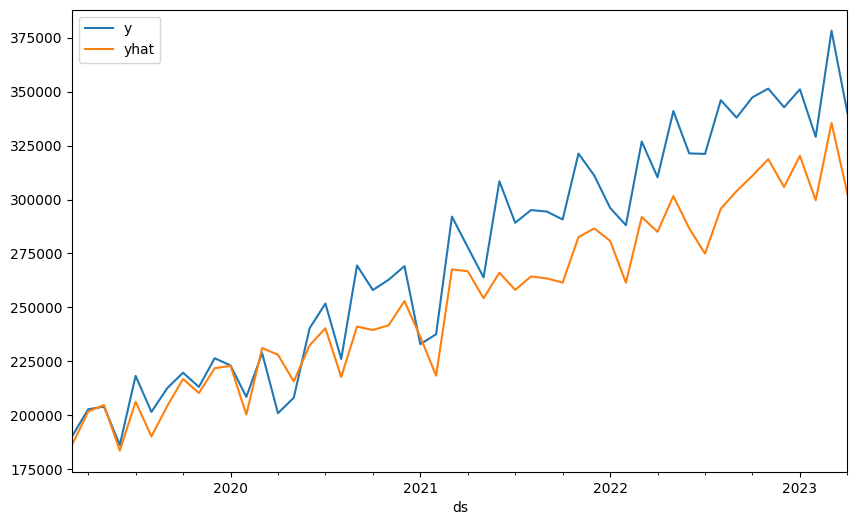

In [494]:
test_validation_after_tuning.plot(x = 'ds', y = ['y','yhat'], figsize = (10,6))

**The plot seems to be better than that of the previous untuned model. IT captures the trend and seasonality  which was lacking in  the previous model**

In [499]:
test_validation_after_tuning

,ds,y,yhat,yhat_lower,yhat_upper
0,2019-03-31,190488.0,186565.769404,184047.305254,189031.229576
1,2019-04-30,202776.0,201724.169039,197882.426212,205931.017154
2,2019-05-31,204019.0,204772.598903,198551.859823,211346.194776
3,2019-06-30,186246.0,183585.738938,175100.878635,192548.472445
4,2019-07-31,218281.0,206286.487299,192888.398795,219364.900762
5,2019-08-31,201556.0,190200.045329,174216.207945,205878.604725
6,2019-09-30,212595.0,204297.406871,183133.158296,223296.974271
7,2019-10-31,219753.0,216832.932712,189776.313194,242347.895220
8,2019-11-30,213140.0,210318.209831,179449.435406,238911.559647
9,2019-12-31,226439.0,221814.633934,185516.145136,256844.059216


In [501]:
volumes_per_year = forecast_after_tuning_trunc[['ds','yhat']]

In [502]:
volumes_per_year

,ds,yhat
0,2008-05-31,473.675418
1,2008-06-30,3616.895966
2,2008-07-31,6519.689580
3,2008-08-31,8537.745138
4,2008-09-30,12163.311980
...,...,...
195,2024-08-31,341530.349664
196,2024-09-30,352892.017415
197,2024-10-31,370148.689688
198,2024-11-30,358659.096531


In [503]:
volumes_per_year['Year'] = pd.DatetimeIndex(volumes_per_year['ds']).year  

<ipython-input-503-6574da39a8f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [529]:
volumes_per_year.head(36)

,ds,yhat,Year
0,2008-05-31,473.675418,2008
1,2008-06-30,3616.895966,2008
2,2008-07-31,6519.689580,2008
3,2008-08-31,8537.745138,2008
4,2008-09-30,12163.311980,2008
5,2008-10-31,15430.134251,2008
6,2008-11-30,15980.989861,2008
7,2008-12-31,19506.540390,2008
8,2009-01-31,19158.081800,2009
9,2009-02-28,18440.350530,2009


In [537]:
# Find the Total volumes of the payments , year wise 

In [540]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [541]:
total_vol_year = pd.DataFrame(volumes_per_year.groupby('Year')['yhat'].sum())

In [542]:
total_vol_year

,yhat
Year,
2008,82228.982583873
2009,294633.118819443
2010,424153.640593045
2011,524062.415495442
2012,810809.160439109
2013,964928.866732988
2014,1098517.787160109
2015,1244548.326290312
2016,1420660.158118402


In [546]:
# From the above  Analysis we can see tha the total estimated volume fo the  Fast payment systems(FPS)   in 2023 is 3891538.700292565 (in 000s)

# and the totalestimated volume of the Fast payment systems(FPS)  in 2024 is 4245840.648164249 (in 000s)